In [111]:
import pickle
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [55]:
# helper functions
def get_descriptors(component, desc):
    ''' generate a list of descritpors for the particular component
    '''
    desc_vec = []
    for key in desc.keys():
        desc_vec.append(desc[key][component])
    return list(np.array(desc_vec).astype(np.float64))


def make_dataset(df_lookup, desc_halogens, desc_metals, desc_molcats):
    ''' generates the entire dataset
    '''
    desc_halogen_names = ['-'.join(['halogen', key]) for key in desc_halogens.keys()]
    desc_metal_names = ['-'.join(['metals', key]) for key in desc_metals.keys()]
    desc_molcat_names = ['-'.join(['molcats', key]) for key in desc_molcats.keys()]
    
    # is_feas = 0 (1) if (in)feasible
    all_data = {'molcat': [], 'metal': [], 'halogen': [], 'is_feas': [], 'bandgap_obj': [], 'm_star_obj': []}
    for desc_name in desc_molcat_names+desc_metal_names+desc_halogen_names:
        all_data[desc_name] = []
        
    molcats = ['H3S', 'NH4', 'MS', 'MA', 'MP', 'FA', 'EA', 'G', 'AA', 'ED', 'tBA']
    metals = ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Pd', 'Pt', 'Cu', 'Ag',
              'Au', 'Zn', 'Cd', 'Hg', 'Ga', 'In', 'Tl', 'Si', 'Ge', 'Sn', 'Pb', 'Bi', 'S', 'Se', 'Te']
    halogens = ['F', 'Cl', 'Br', 'I']

        
    for molcat in molcats:
        for metal in metals:
            for halogen in halogens:
                match = df_lookup.loc[(df_lookup['molcat'] == molcat) &
                           (df_lookup['metal'] == metal) &
                           (df_lookup['halogen'] == halogen)]
                assert len(match) in [1, 0]
                if len(match)==0:
                    bandgap_obj = np.nan
                    m_star_obj = np.nan
                    all_data['is_feas'].append(1)
                    
                elif len(match) == 1:
                    bandgap_obj = np.abs(match.loc[:, 'bandgap'].to_numpy()[0] - 1.25)
                    m_star_obj = match.loc[:, 'm_star'].to_numpy()[0]
                    all_data['is_feas'].append(0)
                    
                else:
                    raise ValueError()
            
#                 row = row.to_dict()
#                 molcat=row['molcat']
#                 metal=row['metal']
#                 halogen=row['halogen']

                desc_molcat = get_descriptors(molcat, desc_molcats)
                desc_metal = get_descriptors(metal, desc_metals)
                desc_halogen = get_descriptors(halogen, desc_halogens)

                all_data['molcat'].append(molcat)
                all_data['metal'].append(metal)
                all_data['halogen'].append(halogen)

                all_data['bandgap_obj'].append(bandgap_obj)
                all_data['m_star_obj'].append(m_star_obj)

                for key, val in zip(desc_molcat_names, desc_molcat):
                    all_data[key].append(val)

                for key, val in zip(desc_metal_names, desc_metal):
                    all_data[key].append(val)

                for key, val in zip(desc_halogen_names, desc_halogen):
                    all_data[key].append(val )
        
    
    return pd.DataFrame(all_data)

In [56]:
# load in the reference data
df_lookup = pd.read_csv('df_results.csv')
print(df_lookup.shape)
df_lookup.head()

(111, 10)


,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
0,0.0,0.0,7.11,7.14,>1000,-0.565,2.54,H3S,In,Cl
1,0.0,20.0,44.46,>1000,44.46,-0.467,1.52,MP,Mn,Cl
2,0.0,0.0,0.34,0.35,6.64,-1.056,4.00,NH4,Ca,Br
3,0.0,0.0,0.52,1.09,0.99,-0.415,3.06,MP,Ge,Cl
4,0.0,0.0,363.95,>1000,417.06,-0.231,1.03,H3S,Te,Br


In [57]:
# load individual descriptor files
# dictionaries with {'option_1': {'desc_1': val, 'desc_2': val, ...}, ...}

desc_halogens = pickle.load(open('descriptors/desc_halogens.pkl', 'rb'))
desc_metals = pickle.load(open('descriptors/desc_metals.pkl', 'rb'))
desc_molcats = pickle.load(open('descriptors/desc_molcats.pkl', 'rb'))

# number of descritpors, number of options
print('HALOGENS : ', len(desc_halogens), len(desc_halogens['electron_affinity'])) 
print('METALS : ', len(desc_metals), len(desc_metals['electron_affinity'])) 
print('MOLCATS : ', len(desc_molcats), len(desc_molcats['mw'])) 

HALOGENS :  4 4
METALS :  4 29
MOLCATS :  6 11


In [58]:
# generate descriptors for all possible perovskites


In [59]:
desc = get_descriptors('H3S', desc_molcats)

In [60]:
df = make_dataset(df_lookup, desc_halogens, desc_metals, desc_molcats)

In [61]:
df

,molcat,metal,halogen,is_feas,bandgap_obj,m_star_obj,molcats-scf_e,molcats-homo_e,molcats-lumo_e,molcats-dip_mom_norm,molcats-radius_2d,molcats-mw,metals-electron_affinity,metals-electronegativity,metals-ionization_energy,metals-total_mass,halogen-electron_affinity,halogen-electronegativity,halogen-ionization_energy,halogen-total_mass
0,H3S,Be,F,1,NaN,NaN,-11942.468771,-15.883013,-6.655633,1.245348,0.0,34.994998,-0.500000,1.57,9.32269,9.01218,3.401190,3.98,17.42282,18.998403
1,H3S,Be,Cl,1,NaN,NaN,-11942.468771,-15.883013,-6.655633,1.245348,0.0,34.994998,-0.500000,1.57,9.32269,9.01218,3.612725,3.16,12.96764,35.453000
2,H3S,Be,Br,1,NaN,NaN,-11942.468771,-15.883013,-6.655633,1.245348,0.0,34.994998,-0.500000,1.57,9.32269,9.01218,3.363588,2.96,11.81381,79.904000
3,H3S,Be,I,1,NaN,NaN,-11942.468771,-15.883013,-6.655633,1.245348,0.0,34.994998,-0.500000,1.57,9.32269,9.01218,3.059047,2.66,10.45126,126.904500
4,H3S,Mg,F,1,NaN,NaN,-11942.468771,-15.883013,-6.655633,1.245348,0.0,34.994998,-0.400000,1.31,7.64624,24.30500,3.401190,3.98,17.42282,18.998403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,tBA,Se,I,1,NaN,NaN,-5823.944381,-14.192914,-5.117373,3.962000,1.0,74.096426,2.020605,2.55,9.75238,78.96000,3.059047,2.66,10.45126,126.904500
1272,tBA,Te,F,1,NaN,NaN,-5823.944381,-14.192914,-5.117373,3.962000,1.0,74.096426,1.970875,2.10,9.00960,127.60000,3.401190,3.98,17.42282,18.998403
1273,tBA,Te,Cl,1,NaN,NaN,-5823.944381,-14.192914,-5.117373,3.962000,1.0,74.096426,1.970875,2.10,9.00960,127.60000,3.612725,3.16,12.96764,35.453000
1274,tBA,Te,Br,1,NaN,NaN,-5823.944381,-14.192914,-5.117373,3.962000,1.0,74.096426,1.970875,2.10,9.00960,127.60000,3.363588,2.96,11.81381,79.904000


## Feature importances for the feasibility classification problem

Looks like we can have good performance classifying the feasibiltiy using our selected 
features --> using vanilla random forests from sklearn

train acc: 1.0 test acc: 0.941

train roc auc: 1.0  train roc auc: 0.893

Looks like the descriptors of the metals are much more important for classifying the feasibility of the perovskites than are the features of the metals and molecular cations

In [92]:
# make classification dataset
X_columns = df.iloc[:, 6:].columns
X = df.iloc[:, 6:].values
y = df.is_feas.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100700, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1020, 14) (1020, 1)
(256, 14) (256, 1)


In [93]:
# random forest model
model = RandomForestClassifier()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

/opt/anaconda3/envs/feas2/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [100]:
pred_train = model.predict(X_train)
prob_train = model.predict_proba(X_train)

pred_test = model.predict(X_test)
prob_test = model.predict_proba(X_test)
prob_train

array([[0.  , 1.  ],
       [0.63, 0.37],
       [0.05, 0.95],
       ...,
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ]])

In [101]:
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)

roc_train = roc_auc_score(y_train, prob_train[:, 1])
roc_test = roc_auc_score(y_test, prob_test[:, 1])

print(acc_train, acc_test)
print(roc_train, roc_test)

1.0 0.94140625
1.0 0.8926767676767676


In [81]:
feat_importances = model.feature_importances_

# the metals seem to be much more important in determining the stability than do 
# either of the molecular cations or the halogens
for name, val in zip(X_columns, feat_importances):
    print(name, val)

molcats-scf_e 0.058206882408973336
molcats-homo_e 0.04340377121475221
molcats-lumo_e 0.023311325836138944
molcats-dip_mom_norm 0.06060799146992576
molcats-radius_2d 0.020243335435953604
molcats-mw 0.0449492079857951
metals-electron_affinity 0.16733742371956403
metals-electronegativity 0.14869229399013173
metals-ionization_energy 0.13686751820523355
metals-total_mass 0.12125671093947231
halogen-electron_affinity 0.04072313866035502
halogen-electronegativity 0.043366476180070695
halogen-ionization_energy 0.04934461049597896
halogen-total_mass 0.04168931345765479


## Feature importances for the regression problems


In [108]:
# make regression datasets 

X_columns = df.iloc[:, 6:].columns
df_reg = df[df.is_feas==0]
print(df_reg.shape)
X = df_reg.iloc[:, 6:].values
y = df_reg[['bandgap_obj', 'm_star_obj']].values

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100700)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_b_train, y_m_train = y_train[:, 0].reshape(-1, 1), y_train[:, 1].reshape(-1, 1)
y_b_test, y_m_test = y_test[:, 0].reshape(-1, 1), y_test[:, 1].reshape(-1, 1)


print(y_b_train.shape, y_b_test.shape )
print(y_m_train.shape, y_m_test.shape )

(111, 20)
(111, 14) (111, 2)
(88, 14) (88, 2)
(23, 14) (23, 2)
(88, 1) (23, 1)
(88, 1) (23, 1)


In [110]:
model_b = RandomForestRegressor()
model_b.fit(X_train, y_b_train)

model_m = RandomForestRegressor()
model_m.fit(X_train, y_m_train)

/opt/anaconda3/envs/feas2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/anaconda3/envs/feas2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor()

In [113]:
pred_b_train = model_b.predict(X_train)
pred_b_test = model_b.predict(X_test)

pred_m_train = model_m.predict(X_train)
pred_m_test = model_m.predict(X_test)

In [114]:
mae_b_train = mean_absolute_error(y_b_train, pred_b_train)
mae_b_test = mean_absolute_error(y_b_test, pred_b_test)

r2_b_train = r2_score(y_b_train, pred_b_train)
r2_b_test = r2_score(y_b_test, pred_b_test)


mae_m_train = mean_absolute_error(y_m_train, pred_m_train)
mae_m_test = mean_absolute_error(y_m_test, pred_m_test)

r2_m_train = r2_score(y_m_train, pred_m_train)
r2_m_test = r2_score(y_m_test, pred_m_test)

In [115]:
print(mae_b_train, mae_b_test)
print(r2_b_train, r2_b_test)
print('='*100)
print(mae_m_train, mae_m_test)
print(r2_m_train, r2_m_test)

0.1412215909090908 0.41719565217391336
0.9697819791395643 0.7040175083648696
11.518979545454537 26.63210869565215
0.9425445601622963 -3.4057747242836864


(0.0, 100.0)

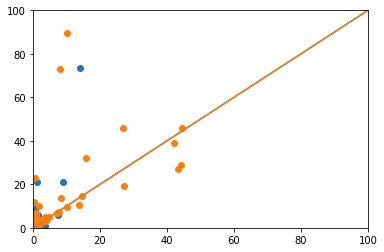

In [130]:
plt.scatter(y_m_test, pred_m_test)
plt.plot([0, 280], [0, 280])

plt.scatter(y_m_train, pred_m_train)
plt.plot([0, 280], [0, 280])

plt.xlim(0, 100)
plt.ylim(0, 100)

<AxesSubplot:xlabel='m_star_obj'>

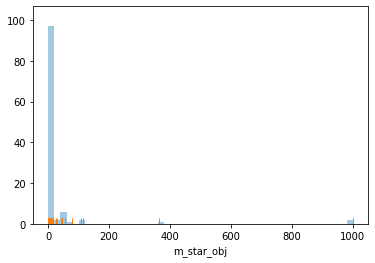

In [120]:
sns.distplot(df_reg['m_star_obj'], kde=False)
sns.rugplot(df_reg['m_star_obj'] )

In [121]:
df_reg[df_reg.m_star_obj>200]

,molcat,metal,halogen,is_feas,bandgap_obj,m_star_obj,molcats-scf_e,molcats-homo_e,molcats-lumo_e,molcats-dip_mom_norm,molcats-radius_2d,molcats-mw,metals-electron_affinity,metals-electronegativity,metals-ionization_energy,metals-total_mass,halogen-electron_affinity,halogen-electronegativity,halogen-ionization_energy,halogen-total_mass
114,H3S,Te,Br,0,0.22,363.95,-11942.468771,-15.883013,-6.655633,1.245348,0.0,34.994998,1.970875,2.10,9.0096,127.600,3.363588,2.96,11.81381,79.904
146,NH4,Fe,Br,0,1.26,1000.00,-1547.325209,-22.404494,-6.315490,0.000000,0.0,18.033826,0.153236,1.83,7.9024,55.847,3.363588,2.96,11.81381,79.904
494,MP,Fe,Br,0,1.26,1000.00,-10410.560772,-16.738539,-5.878476,0.795000,1.0,49.020163,0.153236,1.83,7.9024,55.847,3.363588,2.96,11.81381,79.904


In [124]:
df_reg.m_star_obj.mean(), df_reg.m_star_obj.median()

(29.147747747747754, 1.27)

In [132]:
# feature importances for the bandgap predictions
feat_importances_b = model_b.feature_importances_
feat_importances_m = model_m.feature_importances_

for name, val in zip(X_columns, feat_importances_b):
    print(name, val)

molcats-scf_e 0.016301777649500773
molcats-homo_e 0.030609773370820142
molcats-lumo_e 0.01653468926809452
molcats-dip_mom_norm 0.009687626801260374
molcats-radius_2d 0.003523097801902956
molcats-mw 0.018556641872786512
metals-electron_affinity 0.0660572299731411
metals-electronegativity 0.16445315273636232
metals-ionization_energy 0.06192058739820325
metals-total_mass 0.37743998555183356
halogen-electron_affinity 0.054280399871541714
halogen-electronegativity 0.04383378228038279
halogen-ionization_energy 0.0460945566624163
halogen-total_mass 0.09070669876175354


In [133]:
for name, val in zip(X_columns, feat_importances_m):
    print(name, val)

molcats-scf_e 0.006733713528797282
molcats-homo_e 0.012643437422242911
molcats-lumo_e 0.009757124467490358
molcats-dip_mom_norm 0.0024991217526024465
molcats-radius_2d 0.023559374053330234
molcats-mw 0.03366649626133195
metals-electron_affinity 0.20521253054277233
metals-electronegativity 0.15662698486428503
metals-ionization_energy 0.2592639356162441
metals-total_mass 0.24641684216259324
halogen-electron_affinity 0.01478001697186136
halogen-electronegativity 0.0020449273990802083
halogen-ionization_energy 0.007466441798768816
halogen-total_mass 0.019329053158599833
